In [2]:
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt

# Create dataset with outliers
data = [10, 12, 11, 13, 12, 14, 100]  # 100 is an outlier
print("With Outliers:")
print("Mean:", np.mean(data))
print("Median:", np.median(data))
print("Mode:", stats.mode(data))

# Remove outlier
filtered_data = [x for x in data if x < 50]
print("\nWithout Outliers:")
print("Mean:", np.mean(filtered_data))
print("Median:", np.median(filtered_data))
print("Mode:", stats.mode(filtered_data))


With Outliers:
Mean: 24.571428571428573
Median: 12.0
Mode: 12

Without Outliers:
Mean: 12.0
Median: 12.0
Mode: 12


Mean: 86.46153846153847
Median: 87
Mode: 85


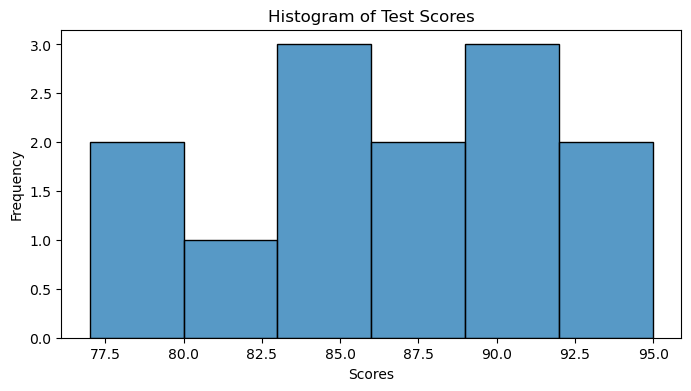

In [3]:
import seaborn as sns

test_scores = [78, 82, 85, 88, 90, 91, 95, 85, 89, 87, 93, 77, 84]

print("Mean:", stats.mean(test_scores))
print("Median:", stats.median(test_scores))
print("Mode:", stats.mode(test_scores))

plt.figure(figsize=(8, 4))
sns.histplot(test_scores, kde=False, bins=6)
plt.title("Histogram of Test Scores")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()


Range: 8
IQR: 4.5
Variance: 7.5
Standard Deviation: 2.7386127875258306


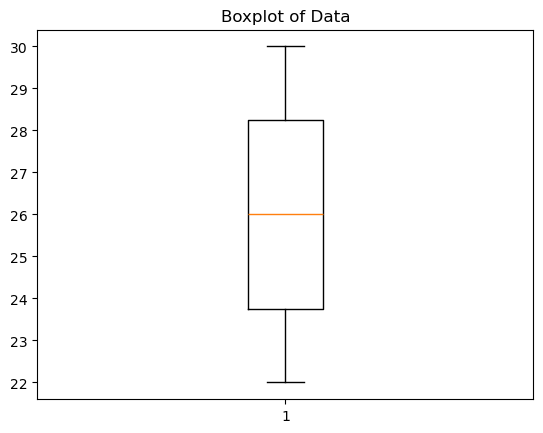

In [4]:
import scipy.stats as st

data = [23, 25, 27, 22, 30, 24, 29, 28]

range_ = np.ptp(data)
iqr = st.iqr(data)
variance = np.var(data)
std_dev = np.std(data)

print(f"Range: {range_}")
print(f"IQR: {iqr}")
print(f"Variance: {variance}")
print(f"Standard Deviation: {std_dev}")

plt.boxplot(data)
plt.title("Boxplot of Data")
plt.show()


In [5]:
from scipy.stats import ttest_rel

before = [67, 70, 72, 68, 65, 74]
after = [72, 75, 78, 70, 68, 79]

t_stat, p_value = ttest_rel(before, after)
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -7.050239879106326
p-value: 0.0008870513737432898


In [6]:
from scipy.stats import norm

def type_errors_demo():
    # H0: mean = 50, HA: mean != 50
    sample = np.random.normal(loc=52, scale=5, size=30)
    stat, p = st.ttest_1samp(sample, 50)

    print("Sample Mean:", np.mean(sample))
    print("p-value:", p)

    if p < 0.05:
        print("Reject H0 — Possible Type I error if H0 is actually true.")
    else:
        print("Fail to reject H0 — Possible Type II error if H0 is false.")

type_errors_demo()


Sample Mean: 51.98462075997341
p-value: 0.0715085651023695
Fail to reject H0 — Possible Type II error if H0 is false.


Predicted Salary for 5 years: 50000.0


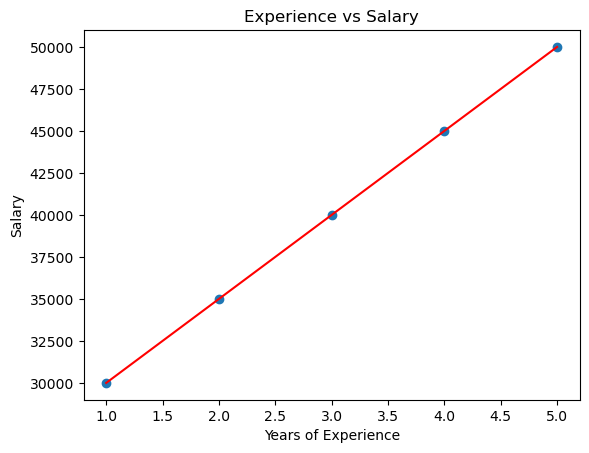

In [7]:
from sklearn.linear_model import LinearRegression

experience = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
salary = np.array([30000, 35000, 40000, 45000, 50000])

model = LinearRegression()
model.fit(experience, salary)

predicted_salary = model.predict([[5]])
print("Predicted Salary for 5 years:", predicted_salary[0])

plt.scatter(experience, salary)
plt.plot(experience, model.predict(experience), color='red')
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate quadratic data
np.random.seed(1)
X = np.linspace(0, 10, 100)
y = 3*X**2 + 2*X + 1 + np.random.randn(100)*10
X = X.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Linear model (underfit)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Polynomial model (overfit)
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

print("MSE Linear:", mean_squared_error(y_test, y_pred_linear))
print("MSE Polynomial:", mean_squared_error(y_test, y_pred_poly))


MSE Linear: 1066.5785893049124
MSE Polynomial: 115.92636613805118


In [9]:
from sklearn.linear_model import Lasso

# Create data
X = np.random.rand(100, 1)*10
y = 2*X.squeeze()**2 + 3*X.squeeze() + np.random.randn(100)*10

# Linear
lin = LinearRegression()
lin.fit(X, y)
lin_mse = mean_squared_error(y, lin.predict(X))

# Polynomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_mse = mean_squared_error(y, poly_model.predict(X_poly))

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_poly, y)
lasso_mse = mean_squared_error(y, lasso.predict(X_poly))

print("Linear MSE:", lin_mse)
print("Polynomial MSE:", poly_mse)
print("Lasso MSE:", lasso_mse)


Linear MSE: 299.88931951460495
Polynomial MSE: 90.57930085896034
Lasso MSE: 90.59544504379338


Pearson correlation: 1.0


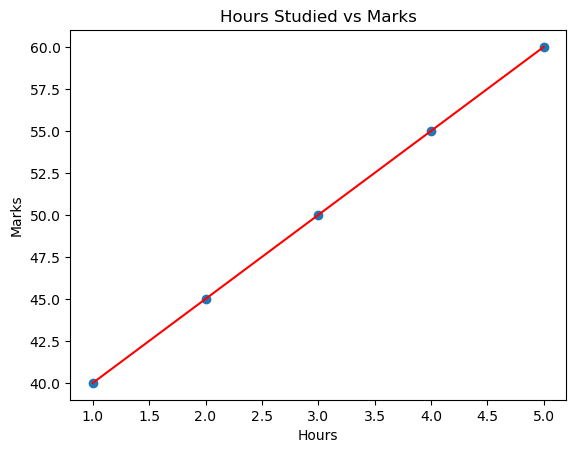

In [10]:
# Data: hours studied vs. marks scored
hours = np.array([1, 2, 3, 4, 5])
marks = np.array([40, 45, 50, 55, 60])

# Pearson correlation
correlation = np.corrcoef(hours, marks)[0, 1]
print("Pearson correlation:", correlation)

# Linear regression
model = LinearRegression()
model.fit(hours.reshape(-1, 1), marks)
predicted = model.predict(hours.reshape(-1, 1))

plt.scatter(hours, marks)
plt.plot(hours, predicted, color='red')
plt.title("Hours Studied vs Marks")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.show()
